In [2]:
import pandas as pd
data=pd.read_csv('../data/Table1.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,Number_of_citations,Indexing_algorithm,global_alignment_algorithm,wrapper,wrapper_of the original tool,...,fix length seed,hybrid seeding (search for keyword variable),spaced seed (search for spaced or gapped),chain_of_seeds,Technology,email - first author,email - last author,Verified,age,citation_per_year
0,1.0,2001,SSAHA,https://www.sanger.ac.uk/science/tools/ssaha,SSAHA: a fast search method for large DNA data...,1093.0,hashing,seed,N,NaN,...,Y,N,N,N,DNA,zn1@sanger.ac.uk,mullikin@mail.nih.gov,base-by-base alignment,19,57.526316
1,2.0,2002,Blat,https://genome.ucsc.edu/cgi-bin/hgBlat,BLAT—the BLAST-like alignment tool,6935.0,hashing,seed,N,NaN,...,Y,N,N,Y,DNA,kent@soe.ucsc.edu,------,"No hamming distance, it keeps increasing the s...",18,385.277778
2,3.0,2003,BLASTZ,https://www.bx.psu.edu/miller_lab/,Human–Mouse Alignments with BLASTZ,1339.0,hashing,seed,Y,A wrapper of PipMaker—A Web Server for Alignin...,...,Y,N,N,N,DNA,webb@bio.cse.psu.edu,wcm2@psu.edu,They change the alignment scoring of BlastZ in...,17,78.764706


In [16]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
tools = data.loc[:,['Aligner','Indexing_algorithm','global_alignment_algorithm','local']]
tools = tools.rename(columns={'local': 'pairwise_alignment'})
tools.head()

,Aligner,Indexing_algorithm,global_alignment_algorithm,pairwise_alignment
0,SSAHA,hashing,seed,hamming distance
1,Blat,hashing,seed,Non-DP heuristic
2,BLASTZ,hashing,seed,SW
3,C4,hashing,seed,"hamming distance, SW, and NW"
4,GMAP,hashing,seed,NW


In [18]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Technology', 'Indexing_algorithm', 'global_alignment_algorithm', 'local']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear_summ = rtyear.loc[:,['Tools', 'Year_of_publication', 'average_runtime', 'Technology', 'Indexing_algorithm', 'global_alignment_algorithm', 'local']]
rtyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,16):
    rtyear.loc[i,'year_split'] = 'Before 2012' if rtyear.loc[i,'Year_of_publication'] < 2012 else '2012 and later'
rtyear_new = pd.melt(rtyear, id_vars = ['Tools', 'year_split', 'Technology', 'Indexing_algorithm', 'global_alignment_algorithm', 'local'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear_new.head()

,Tools,year_split,Technology,Indexing_algorithm,global_alignment_algorithm,local,variable,runtime
0,Bowtie2,2012 and later,DNA,BWT-FM,Backward Search,SW & NW,ERR009309,2.364914
1,Bowtie,Before 2012,DNA,BWT-FM,Backward Search,hamming distance,ERR009309,3.358317
2,BWA,Before 2012,DNA,BWT-FM,Backward Search,SW,ERR009309,4.048227
3,ERNE,2012 and later,DNA,hashing,seed,hamming distance,ERR009309,2.066056
4,gsnap,Before 2012,DNA,hashing,seed,Non-DP heuristic,ERR009309,18.782465


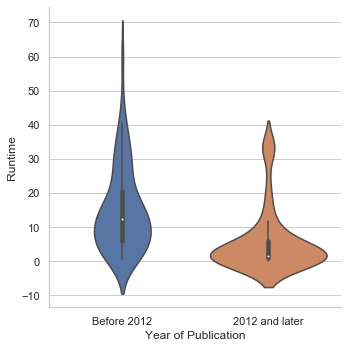

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style='whitegrid')
ax = sns.catplot(data = rtyear_new, x = 'year_split', y = 'runtime', kind = 'violin', 
                 order = ['Before 2012', '2012 and later'])
ax.set(xlabel = 'Year of Publication', ylabel = 'Runtime (hours)')
#plt.show()
plt.savefig('../figures/Runtime_by_YoP.png')

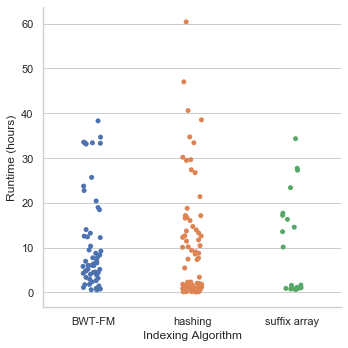

In [24]:
ax = sns.catplot(data = rtyear_new, x = 'Indexing_algorithm', y = 'runtime')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Runtime (hours)')
plt.show()

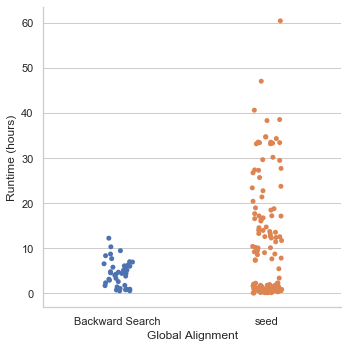

In [25]:
ax = sns.catplot(data = rtyear_new, x = 'global_alignment_algorithm', y = 'runtime')
ax.set(xlabel = 'Global Alignment', ylabel = 'Runtime (hours)')
plt.show()

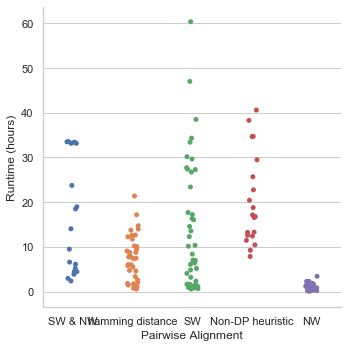

In [26]:
ax = sns.catplot(data = rtyear_new, x = 'local', y = 'runtime')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Runtime (hours)')
plt.show()

In [7]:
data_index = data[['Aligner', 'Indexing_algorithm']]
data_index.loc[:,'aligner_lower'] = data_index.loc[:,'Aligner'].str.lower()
idx_rt.loc[:,'tools_lower'] = rt.loc[:,'Tools'].str.lower()
rtidx = pd.merge(idx_rt, data_index, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtidx = rtidx.dropna()
t = pd.DatetimeIndex(rtidx.loc[:,'Runtime'])
rtidx.loc[:,'Runtime (minutes)'] = t.hour*60 + t.minute
rtidx

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Tools,Runtime,Virtual Mem (G),tools_lower,Aligner,Indexing_algorithm,aligner_lower,Runtime (minutes)
0,bowtie2,1:53:39,5.398,bowtie2,Bowtie2,BWT-FM,bowtie2,113
1,bowtie,1:42:21,5.395,bowtie,Bowtie,BWT-FM,bowtie,102
2,bwa,1:10:43,4.448,bwa,BWA,BWT-FM,bwa,70
3,erne,6:52:25,12.956,erne,ERNE,hashing,erne,412
4,gsnap,1:08:32,19.561,gsnap,GSNAP,hashing,gsnap,68
5,hisat2,1:07:14,5.394,hisat2,HISAT2,BWT-FM,hisat2,67
6,last,0:55:16,28.148,last,LAST,suffix array,last,55
7,lordfast,1:04:37,5.423,lordfast,lordFAST,hashing,lordfast,64
8,novoalign,0:12:45,9.061,minimap2,minimap2,hashing,minimap2,12
9,snap,4:04:26,39.313,rmap,RMAP,hashing,rmap,244


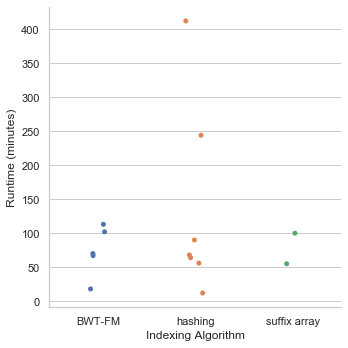

In [8]:
ax = sns.catplot(data = rtidx, x = 'Indexing_algorithm', y = 'Runtime (minutes)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_time.png')

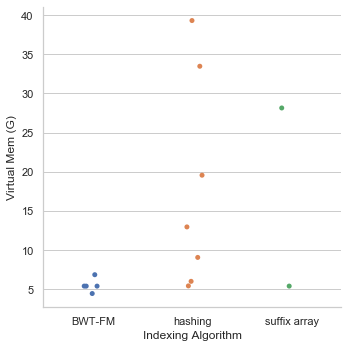

In [9]:
import seaborn as sns

ax = sns.catplot(data = rtidx, x = 'Indexing_algorithm', y = 'Virtual Mem (G)')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_by_mem.png')

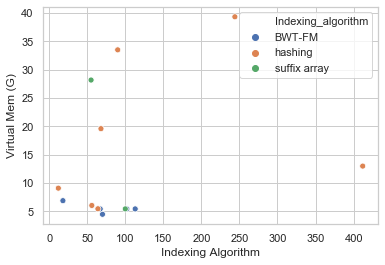

In [10]:
ax = sns.scatterplot(data=rtidx, x = 'Runtime (minutes)', y = 'Virtual Mem (G)', 
                    hue = 'Indexing_algorithm')
ax.set(xlabel = 'Indexing Algorithm')
plt.savefig('../figures/Indexing_mem_vs_runtime.png')